# Adaptive-Thresholding

适用于光照不均匀的图像

自适应阈值分割会根据图像的局部区域计算不同的阈值，从而更好地分割前景和背景。

## 实现原理

在自适应阈值分割中，图像被划分为多个小块（窗口），对于每个小块，计算一个局部阈值。然后根据这个局部阈值将该小块中的像素分为前景和背景。常用的自适应阈值算法有两种：

均值法（Mean）：使用小块内像素的均值作为阈值。
高斯法（Gaussian）：使用小块内像素的加权均值（高斯加权）作为阈值。

In [1]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

import configuration.config as config

## Create Output Folder

In [4]:
path = 'images/output3'

if not os.path.exists(path):
    os.makedirs(path)
    print(f'路径 {path} 已创建')
else:
    print(f'路径 {path} 已存在')

路径 images/output3 已创建


## Import Images

Shape of the color img_gray:  (200, 200, 3)
Shape of the grayscale img_gray:  (200, 200)
Data type of the img_gray:  uint8


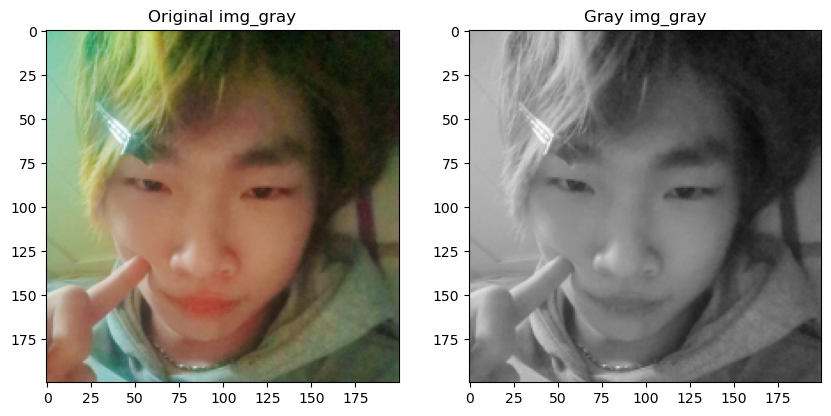

In [5]:
# 导入图像
img_bgr = cv.imread(filename=config.TEST_IMAGE, flags=cv.IMREAD_COLOR)
# img_gray = cv.imread(filename=config.TEST_img_gray, flags=cv.IMREAD_GRAYSCALE)
img_gray = cv.cvtColor(src=img_bgr, code=cv.COLOR_BGR2GRAY)

# output img_gray info
print("Shape of the color img_gray: ", img_bgr.shape)
print("Shape of the grayscale img_gray: ", img_gray.shape)
print("Data type of the img_gray: ", img_bgr.dtype)


# 显示图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)), plt.title('Original img_gray')
plt.subplot(1, 2, 2), plt.imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)), plt.title('Gray img_gray')
plt.show()

较小的 C 值（如 1-3）可以更容易地保留细节，但可能导致更多的噪声。
较大的 C 值（如 5-10）可以减少噪声，但可能会导致一些细节丢失。

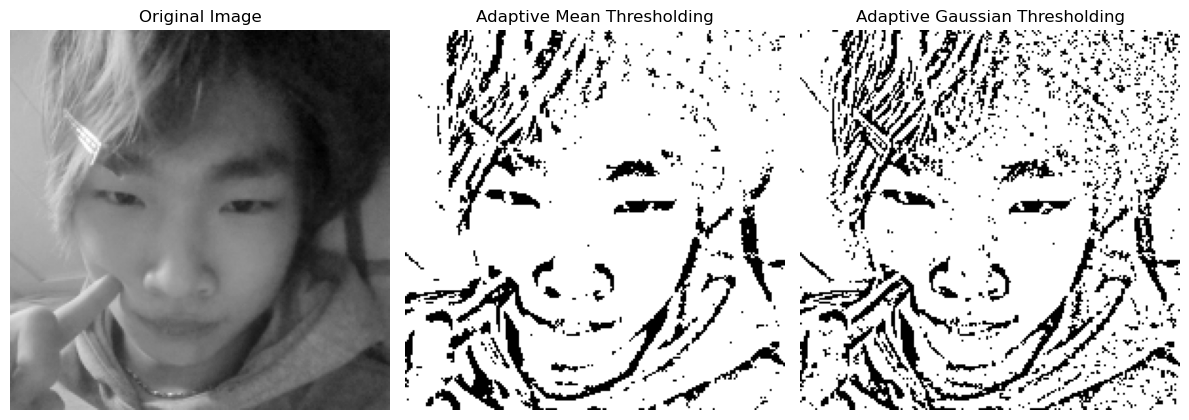

In [29]:
adaptive_threshold_mean = cv.adaptiveThreshold(
    img_gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, blockSize=11, C=8
)

adaptive_threshold_gaussian = cv.adaptiveThreshold(
    img_gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, blockSize=11, C=4
)

# 显示结果
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Adaptive Mean Thresholding")
plt.imshow(adaptive_threshold_mean, cmap="gray")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Adaptive Gaussian Thresholding")
plt.imshow(adaptive_threshold_gaussian, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()